In [13]:
# Syrel Miguel A. Capule | BSCS - III

# Loading an audio file

import warnings
warnings.filterwarnings('ignore')

import librosa
audio_path = 'C:/Users/Miguel Capule/Downloads/test.wav'
x , sr = librosa.load(audio_path)

In [14]:
# Play audio

import IPython.display as ipd
ipd.Audio(audio_path)

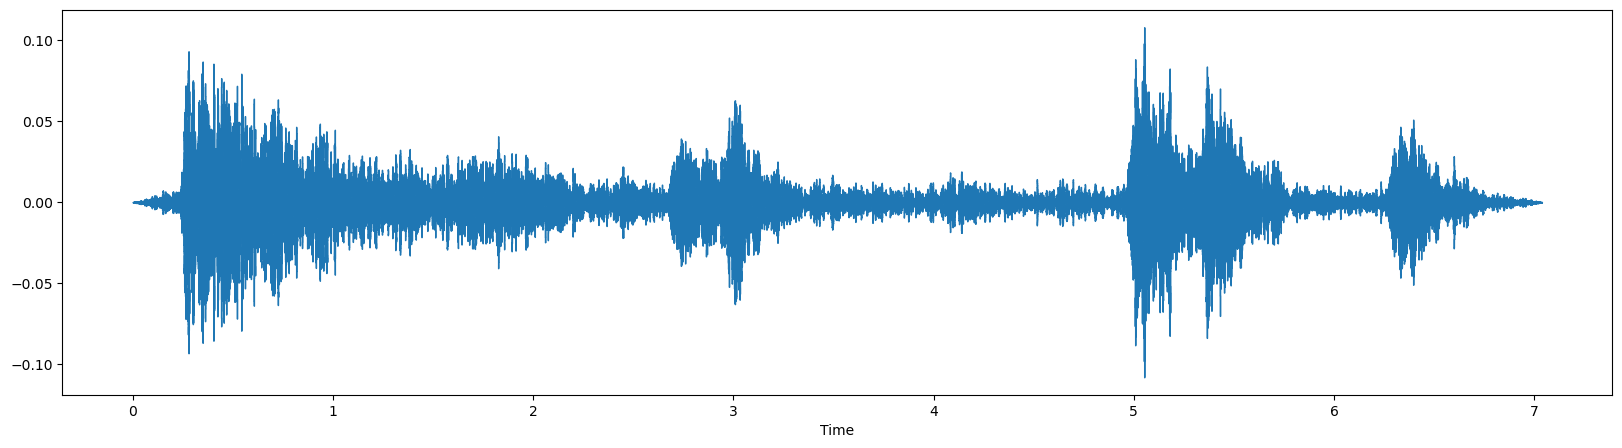

In [15]:
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(20, 5))
librosa.display.waveshow(x, sr=sr)